# Einführung in Neuronale Netzwerke

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
import matplotlib.pylab as plt
import numpy as np

In [4]:
from distutils.version import StrictVersion

In [5]:
import sklearn
print(sklearn.__version__)

assert StrictVersion(sklearn.__version__ ) >= StrictVersion('0.18.1')

0.19.0


In [6]:
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)
print(tf.__version__)

assert StrictVersion(tf.__version__) >= StrictVersion('1.1.0')

1.2.1


In [7]:
import keras
print(keras.__version__)

assert StrictVersion(keras.__version__) >= StrictVersion('2.0.0')

Using TensorFlow backend.


2.0.8


## Iris mit Neuronalen Netzwerken

## Das künstliche Neuron
![Das künstliche Neuron](https://djcordhose.github.io/ai/img/sketch/neuron.jpg "Das künstliche Neuron")

---

# Hands-On
## Erzeuge eine Python-Implementierung eines Neurons mit zwei Eingabevariablen ohne Activation Funktion

---

In [ ]:
%load https://djcordhose.github.io/ai/fragments/neuron.py

In [15]:
from sklearn.datasets import load_iris
iris = load_iris()
iris.data[0]

array([ 5.1,  3.5,  1.4,  0.2])

In [16]:
neuron_no_activation(5.1, 3.5)

-10.399999999999999

### Activation Functions

In [1]:
def centerAxis(uses_negative=False):
    # http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot
    ax = plt.gca()
    ax.spines['left'].set_position('center')
    if uses_negative:
        ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

### Sigmoid

In [2]:
import math as math
def sigmoid(x):
    return 1 / (1 + math.exp(x * -1))

In [3]:
def np_sigmoid(X):
    return 1 / (1 + np.exp(X * -1))

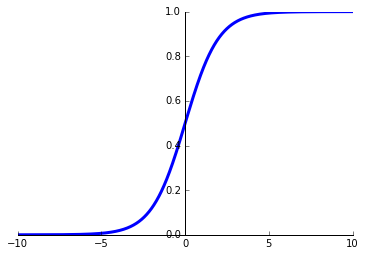

In [8]:
x = np.arange(-10,10,0.01)
y = np_sigmoid(x)

centerAxis()
plt.plot(x,y,lw=3)

### Relu

In [10]:
def np_relu(x):
    return np.maximum(0, x)

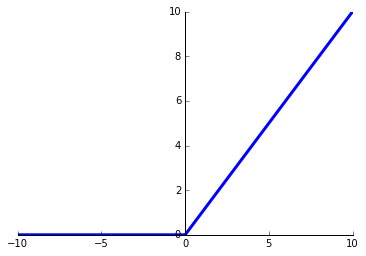

In [11]:
x = np.arange(-10,10,0.01)
y = np_relu(x)

centerAxis()
plt.plot(x,y,lw=3)

### Das komplette Neuron

In [18]:
w0 = 3
w1 = -4
w2 = 2

def neuron(x1, x2):
    sum = w0 + x1 * w1 + x2 * w2
    return sigmoid(sum)

In [19]:
neuron(5.1, 3.5)

3.043155690056538e-05

## Unser erste Neuronales Netz mit Keras
![Neuron zu Netz](https://djcordhose.github.io/ai/img/sketch/neuron_to_layers.jpg "Neuron zu Netz")

In [20]:
from keras.layers import Input
inputs = Input(shape=(4, ))

In [21]:
from keras.layers import Dense
fc = Dense(3)(inputs)

In [22]:
from keras.models import Model
model = Model(input=inputs, output=fc)

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 4)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 15        
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
model.predict(np.array([[ 5.1,  3.5,  1.4,  0.2]]))

array([[ 0.5730291 ,  0.84020025,  1.63974118]], dtype=float32)

![Fully Connected](https://djcordhose.github.io/ai/img/sketch/fc_nn.jpg "Fully Connected")

In [26]:
inputs = Input(shape=(4, ))
fc = Dense(3)(inputs)
predictions = Dense(3, activation='softmax')(fc)
model = Model(input=inputs, output=predictions)

In [27]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 4)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 15        
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 12        
Total params: 27
Trainable params: 27
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
model.predict(np.array([[ 5.1,  3.5,  1.4,  0.2]]))

array([[ 0.00303817,  0.43617448,  0.56078732]], dtype=float32)

# Training

In [30]:
X = np.array(iris.data)
y = np.array(iris.target)
X.shape, y.shape

((150, 4), (150,))

In [31]:
y[100]

2

In [32]:
from keras.utils.np_utils import to_categorical

num_categories = 3

y = to_categorical(y, num_categories)

In [33]:
y[100]

array([ 0.,  0.,  1.])

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [35]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 3), (30, 3))

In [36]:
!rm -r tf_log

# https://keras.io/callbacks/#tensorboard
tb_callback = keras.callbacks.TensorBoard(log_dir='./tf_log')
# To start tensorboard
# tensorboard --logdir=/mnt/c/Users/olive/Development/ml/tf_log
# open http://localhost:6006

In [37]:
%time model.fit(X_train, y_train, epochs=500, validation_split=0.3, callbacks=[tb_callback])

Train on 84 samples, validate on 36 samples
Epoch 1/500
84/84 [==============================] - 0s - loss: 2.5089 - acc: 0.3333 - val_loss: 2.3089 - val_acc: 0.3333
Epoch 2/500
84/84 [==============================] - 0s - loss: 2.4558 - acc: 0.3333 - val_loss: 2.2572 - val_acc: 0.3333
Epoch 3/500
84/84 [==============================] - 0s - loss: 2.3994 - acc: 0.3333 - val_loss: 2.2083 - val_acc: 0.3333
Epoch 4/500
84/84 [==============================] - 0s - loss: 2.3570 - acc: 0.3333 - val_loss: 2.1612 - val_acc: 0.3333
Epoch 5/500
84/84 [==============================] - 0s - loss: 2.3059 - acc: 0.3333 - val_loss: 2.1158 - val_acc: 0.3333
Epoch 6/500
84/84 [==============================] - 0s - loss: 2.2572 - acc: 0.3333 - val_loss: 2.0720 - val_acc: 0.3333
Epoch 7/500
84/84 [==============================] - 0s - loss: 2.2108 - acc: 0.3333 - val_loss: 2.0294 - val_acc: 0.3333
Epoch 8/500
84/84 [==============================] - 0s - loss: 2.1649 - acc: 0.3333 - val_loss: 1.987

84/84 [==============================] - 0s - loss: 0.6994 - acc: 0.6786 - val_loss: 0.7367 - val_acc: 0.6389
Epoch 133/500
84/84 [==============================] - 0s - loss: 0.6965 - acc: 0.6786 - val_loss: 0.7342 - val_acc: 0.6389
Epoch 134/500
84/84 [==============================] - 0s - loss: 0.6936 - acc: 0.6786 - val_loss: 0.7315 - val_acc: 0.6389
Epoch 135/500
84/84 [==============================] - 0s - loss: 0.6911 - acc: 0.6786 - val_loss: 0.7290 - val_acc: 0.6389
Epoch 136/500
84/84 [==============================] - 0s - loss: 0.6881 - acc: 0.6786 - val_loss: 0.7260 - val_acc: 0.6389
Epoch 137/500
84/84 [==============================] - 0s - loss: 0.6859 - acc: 0.6786 - val_loss: 0.7230 - val_acc: 0.6389
Epoch 138/500
84/84 [==============================] - 0s - loss: 0.6829 - acc: 0.6786 - val_loss: 0.7204 - val_acc: 0.6389
Epoch 139/500
84/84 [==============================] - 0s - loss: 0.6803 - acc: 0.6786 - val_loss: 0.7181 - val_acc: 0.6389
Epoch 140/500
84/84 [=

84/84 [==============================] - 0s - loss: 0.4993 - acc: 0.6786 - val_loss: 0.5361 - val_acc: 0.6667
Epoch 264/500
84/84 [==============================] - 0s - loss: 0.4985 - acc: 0.6905 - val_loss: 0.5349 - val_acc: 0.6667
Epoch 265/500
84/84 [==============================] - 0s - loss: 0.4977 - acc: 0.6905 - val_loss: 0.5338 - val_acc: 0.6944
Epoch 266/500
84/84 [==============================] - 0s - loss: 0.4971 - acc: 0.7024 - val_loss: 0.5326 - val_acc: 0.7222
Epoch 267/500
84/84 [==============================] - 0s - loss: 0.4962 - acc: 0.7024 - val_loss: 0.5318 - val_acc: 0.7222
Epoch 268/500
84/84 [==============================] - 0s - loss: 0.4952 - acc: 0.7024 - val_loss: 0.5308 - val_acc: 0.7222
Epoch 269/500
84/84 [==============================] - 0s - loss: 0.4943 - acc: 0.7024 - val_loss: 0.5299 - val_acc: 0.7222
Epoch 270/500
84/84 [==============================] - 0s - loss: 0.4936 - acc: 0.7024 - val_loss: 0.5290 - val_acc: 0.7222
Epoch 271/500
84/84 [=

84/84 [==============================] - 0s - loss: 0.4092 - acc: 0.9048 - val_loss: 0.4298 - val_acc: 0.8611
Epoch 394/500
84/84 [==============================] - 0s - loss: 0.4094 - acc: 0.9048 - val_loss: 0.4295 - val_acc: 0.8611
Epoch 395/500
84/84 [==============================] - 0s - loss: 0.4082 - acc: 0.9048 - val_loss: 0.4285 - val_acc: 0.8611
Epoch 396/500
84/84 [==============================] - 0s - loss: 0.4075 - acc: 0.9048 - val_loss: 0.4277 - val_acc: 0.8611
Epoch 397/500
84/84 [==============================] - 0s - loss: 0.4069 - acc: 0.9048 - val_loss: 0.4268 - val_acc: 0.8889
Epoch 398/500
84/84 [==============================] - 0s - loss: 0.4068 - acc: 0.9167 - val_loss: 0.4258 - val_acc: 0.9167
Epoch 399/500
84/84 [==============================] - 0s - loss: 0.4058 - acc: 0.9167 - val_loss: 0.4253 - val_acc: 0.8889
Epoch 400/500
84/84 [==============================] - 0s - loss: 0.4051 - acc: 0.9167 - val_loss: 0.4245 - val_acc: 0.9167
Epoch 401/500
84/84 [=

# Bewertung

In [38]:
model.predict(np.array([[ 5.1,  3.5,  1.4,  0.2]]))

array([[  9.74352717e-01,   2.47662328e-02,   8.81039887e-04]], dtype=float32)

In [39]:
X[0], y[0]

(array([ 5.1,  3.5,  1.4,  0.2]), array([ 1.,  0.,  0.]))

In [40]:
train_loss, train_accuracy = model.evaluate(X_train, y_train)
train_loss, train_accuracy

 32/120 [=======>......................] - ETA: 0s

(0.34883592923482259, 0.9666666626930237)

In [41]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
test_loss, test_accuracy

30/30 [==============================] - 0s


(0.33544877171516418, 0.96666663885116577)

## Model im Keras und TensorFlow Format speichern

In [42]:
model.save('nn-iris.hdf5')

## Export as raw tf model

* https://tensorflow.github.io/serving/serving_basic.html
* https://github.com/tensorflow/serving/blob/master/tensorflow_serving/example/mnist_saved_model.py

In [43]:
import os
from keras import backend as K

In [44]:
K.set_learning_phase(0)

In [45]:
sess = K.get_session()

In [46]:
!rm -r tf

rm: cannot remove 'tf': No such file or directory


In [47]:
tf.app.flags.DEFINE_integer('model_version', 1, 'version number of the model.')
tf.app.flags.DEFINE_string('work_dir', '/tmp', 'Working directory.')
FLAGS = tf.app.flags.FLAGS

In [48]:
export_path_base = 'tf'
export_path = os.path.join(
  tf.compat.as_bytes(export_path_base),
  tf.compat.as_bytes(str(FLAGS.model_version)))

In [49]:
classification_inputs = tf.saved_model.utils.build_tensor_info(model.input)
classification_outputs_scores = tf.saved_model.utils.build_tensor_info(model.output)

In [50]:
from tensorflow.python.saved_model.signature_def_utils_impl import build_signature_def, predict_signature_def

In [51]:
signature = predict_signature_def(inputs={'inputs': model.input},
                                  outputs={'scores': model.output})

In [52]:
builder = tf.saved_model.builder.SavedModelBuilder(export_path)

In [53]:
builder.add_meta_graph_and_variables(
      sess, 
     tags=[tf.saved_model.tag_constants.SERVING],
      signature_def_map={
          tf.saved_model.signature_constants.DEFAULT_SERVING_SIGNATURE_DEF_KEY: signature
      })

In [54]:
builder.save()

b'tf/1/saved_model.pb'

In [63]:
!ls -lhR tf

tf:
total 0
drwxrwxrwx 0 root root 512 Aug 29 14:42 1

tf/1:
total 55M
-rwxrwxrwx 1 root root 108K Aug 29 14:42 saved_model.pb
drwxrwxrwx 0 root root  512 Aug 29 14:42 variables

tf/1/variables:
total 577K
-rwxrwxrwx 1 root root 432 Aug 29 14:42 variables.data-00000-of-00001
-rwxrwxrwx 1 root root 719 Aug 29 14:42 variables.index


## Dieses Tensorflow Modell kann man bei Google Cloud ML hochladen und für Berechnungen nutzen

In [ ]:
# cd tf
# gsutil cp -R 1 gs://irisnn
# create model and version at https://console.cloud.google.com/mlengine
# gcloud ml-engine predict --model=irisnn --json-instances=./sample_iris.json
# SCORES
# [0.9954029321670532, 0.004596732556819916, 3.3544753819114703e-07]